In [ ]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train_labels=[]
train_samples=[]

In [ ]:
for i in range(50):
  random_younger=randint(13,64)  # 5% of younger individuals who did experience side effects
  train_samples.append(random_younger)
  train_labels.append(1)

  random_older=randint(65,100)  # 5% of older individuals who did not experience side effects
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
  random_younger=randint(13,64)  # 95% of younger individuals who did not experience side effects
  train_samples.append(random_younger)
  train_labels.append(0)

  random_older=randint(65,100)  # 95% of older individuals who did experience side effects
  train_samples.append(random_older)
  train_labels.append(1)

In [ ]:
for i in range(1000):
  random_younger=randint(13,64)  # 95% of younger individuals who did not experience side effects
  train_samples.append(random_younger)
  train_labels.append(0)

  random_older=randint(65,100)  # 95% of older individuals who did experience side effects
  train_samples.append(random_older)
  train_labels.append(1)

In [ ]:
for i in train_samples:
  print(i)

In [ ]:
for i in train_labels:
  print(i)

In [ ]:
#converting to numpy array and shuffling

train_labels=np.array(train_labels)
train_samples=np.array(train_samples)
train_labels,train_samples=shuffle(train_labels,train_samples)

In [ ]:
#feature scaling with minmax scaler
Scaler=MinMaxScaler(feature_range=(0,1))
scaled_train_samples=Scaler.fit_transform(train_samples.reshape(-1,1))

In [ ]:
for i in scaled_train_samples:
  print(i)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

The documentation of keras tensorflow package can be found in the below link

https://www.tensorflow.org/api_docs/python/tf/keras

we will using activation and models in the documentation list to start with.

Learn more about the sequential model here

https://www.tensorflow.org/guide/keras/sequential_model

In [ ]:
#Specifying only the architecture of the model

model=Sequential([                                                      #dense means fully connected layer in ANN
                  Dense(units=16, input_shape=(1,), activation='relu'), # 1 hidden layer with 16 nodes with relu activation, input shape is an optional parameter
                  Dense(units=32, activation='relu'),                   # 2 hidden layer with 32 nodes with relu activation
                  Dense(units=2, activation='softmax')                  # output layer with 2 possible outcomes with softmax activation
])

Calculation of parameters:

In the first hidden layer, there are 16 neurons. The input layer is having size of (1,m). With one feature input and 16 neurons, 

W[1] => 1 x 16 <br>
b[1] => 1 x 16 (each neuron has one bias term)

Hence the total number of parameters associated with first layer is **16+16=32**

In the second hidden layer, there are 32 neurons.<br>
W[2] => 16 x 32 <br>
b[2] => 1 x 32 (each neuron has one bias term)

Hence the total number of parameters associated with first layer is **512+32=544**

In the third hidden layer, there are 2 neurons.<br>
W[3] => 32 x 2 <br>
b[3] => 1 x 2 (each neuron has one bias term)

Hence the total number of parameters associated with first layer is **64+2=66**

The total number of learnable parameters in the  model is given by

= **32+544+66=642**

model.summary() will give the complete details of the learnable parameter in the model


In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 16)                32        
                                                                 
 dense_28 (Dense)            (None, 32)                544       
                                                                 
 dense_29 (Dense)            (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________



Once the model is created, you can config the model with losses and metrics with model.compile(), train the model with model.fit(), or use the model to do prediction with model.predict().

https://www.tensorflow.org/api_docs/python/tf/keras/Model

Different losses associated with tensorflow packages are given in the link below

https://www.tensorflow.org/api_docs/python/tf/keras/losses

Different metrices associated with tensorflow packages are given in the link below

https://www.tensorflow.org/api_docs/python/tf/keras/metrics



In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy']) 

https://www.tensorflow.org/api_docs/python/tf/keras/Model



In [ ]:
model.fit(x=scaled_train_samples,y=train_labels,validation_split=0.1,batch_size=10,epochs=30,shuffle=True,verbose=2)  # in train set shuffle=true by default

Epoch 1/30
369/369 - 1s - loss: 0.7277 - accuracy: 0.3978 - val_loss: 0.6925 - val_accuracy: 0.5854 - 1s/epoch - 4ms/step
Epoch 2/30
369/369 - 1s - loss: 0.6566 - accuracy: 0.6995 - val_loss: 0.6211 - val_accuracy: 0.7780 - 601ms/epoch - 2ms/step
Epoch 3/30
369/369 - 1s - loss: 0.5917 - accuracy: 0.7954 - val_loss: 0.5641 - val_accuracy: 0.8366 - 588ms/epoch - 2ms/step
Epoch 4/30
369/369 - 1s - loss: 0.5328 - accuracy: 0.8401 - val_loss: 0.5032 - val_accuracy: 0.8659 - 570ms/epoch - 2ms/step
Epoch 5/30
369/369 - 1s - loss: 0.4720 - accuracy: 0.8732 - val_loss: 0.4417 - val_accuracy: 0.8976 - 611ms/epoch - 2ms/step
Epoch 6/30
369/369 - 1s - loss: 0.4144 - accuracy: 0.8986 - val_loss: 0.3867 - val_accuracy: 0.8976 - 608ms/epoch - 2ms/step
Epoch 7/30
369/369 - 1s - loss: 0.3654 - accuracy: 0.9084 - val_loss: 0.3405 - val_accuracy: 0.9268 - 590ms/epoch - 2ms/step
Epoch 8/30
369/369 - 1s - loss: 0.3259 - accuracy: 0.9263 - val_loss: 0.3043 - val_accuracy: 0.9366 - 573ms/epoch - 2ms/step
Epo

## Preprocess test set

In [ ]:
test_labels=[]
test_samples=[]


In [ ]:
for i in range(10):
  random_younger=randint(13,64)  # 5% of younger individuals who did experience side effects
  test_samples.append(random_younger)
  test_labels.append(1)

  random_older=randint(65,100)  # 5% of older individuals who did not experience side effects
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(200):
  random_younger=randint(13,64)  # 95% of younger individuals who did not experience side effects
  test_samples.append(random_younger)
  test_labels.append(0)

  random_older=randint(65,100)  # 95% of older individuals who did experience side effects
  test_samples.append(random_older)
  test_labels.append(1)

In [ ]:
test_labels=np.array(test_labels)
test_samples=np.array(test_samples)
test_labels,test_samples=shuffle(test_labels,test_samples)

In [ ]:
scaled_test_samples=Scaler.fit_transform(test_samples.reshape(-1,1))

## Predict

In [ ]:
predictions=model.predict(x=scaled_test_samples,batch_size=10,verbose=0)

In [ ]:
for i in predictions:
  print(i)

[0.980114   0.01988599]
[0.98631376 0.01368614]
[0.00744287 0.99255717]
[0.9869469  0.01305298]
[0.98631376 0.01368614]
[0.01160218 0.9883977 ]
[0.98731303 0.01268706]
[0.97741944 0.0225805 ]
[0.02150986 0.9784902 ]
[0.01970218 0.98029774]
[0.43235013 0.5676498 ]
[0.98631376 0.01368614]
[0.00744287 0.99255717]
[0.04308746 0.9569126 ]
[0.65859586 0.34140417]
[0.98631376 0.01368614]
[0.9494403  0.05055967]
[0.98618364 0.01381636]
[0.9494403  0.05055967]
[0.9252304  0.07476958]
[0.98631376 0.01368614]
[0.04308746 0.9569126 ]
[0.97085    0.02915008]
[0.0088911  0.99110895]
[0.086161 0.913839]
[0.9883509  0.01164895]
[0.97741944 0.0225805 ]
[0.00744287 0.99255717]
[0.9875513  0.01244874]
[0.98657066 0.01342932]
[0.70876044 0.2912395 ]
[0.54794896 0.45205104]
[0.98441255 0.01558736]
[0.1302709 0.869729 ]
[0.9494403  0.05055967]
[0.00813508 0.99186486]
[0.04693798 0.95306194]
[0.7947873  0.20521265]
[0.65859586 0.34140417]
[0.9883996  0.01160032]
[0.1302709 0.869729 ]
[0.1302709 0.869729 ]
[0

In [ ]:
rounded_predictions=np.argmax(predictions,axis=-1)

In [ ]:
for i in rounded_predictions:
  print(i)

0
0
1
0
0
1
0
0
1
1
1
0
1
1
0
0
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
0
0
1
0
1
1
0
0
0
1
1
0
1
1
0
1
1
1
1
0
1
0
0
1
0
0
1
0
0
1
1
1
1
1
0
0
1
1
0
1
1
0
1
1
1
0
0
1
1
0
1
0
0
0
1
1
0
1
0
0
1
0
1
0
1
0
1
1
1
1
0
1
0
1
0
0
1
1
1
1
1
0
0
0
1
0
0
0
1
1
0
0
1
1
1
1
0
1
0
1
1
0
0
1
0
1
1
1
1
1
1
1
1
1
0
0
0
0
1
1
0
1
1
0
0
1
0
0
0
1
1
0
0
1
0
1
0
0
1
0
0
1
1
1
1
1
1
0
1
1
1
0
0
1
0
0
1
1
0
0
0
0
0
0
0
0
1
0
1
1
1
0
0
1
0
0
1
1
0
0
0
0
1
0
0
0
1
1
1
1
1
0
1
0
1
1
0
1
0
0
1
0
0
0
1
0
1
0
1
1
1
1
0
0
0
0
0
0
0
1
0
1
0
0
1
1
0
1
1
1
0
0
1
1
1
1
1
0
0
0
1
0
0
0
0
0
0
1
1
1
0
0
1
1
0
1
1
0
1
0
1
1
0
0
0
0
0
1
0
0
0
1
1
0
1
0
1
1
0
1
1
1
0
0
1
1
1
1
1
0
1
0
1
1
1
0
1
1
1
0
0
0
0
1
1
0
0
1
1
0
0
0
1
0
1
0
1
0
0
1
1
0
1
0
1
1
0
0
1
1
1
0
1
1
1
0
1
1
0
0
0
1
1
0
0
1
0
1
0
0
1
1
1
0
1
0
0
0
0
0
1
0
1
1
1
0
1
1
0
0
0
0
0
1
1
1
0
1
1
1
1
1
0
1
0
1
0
1
0


## Confusion Matrix

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt


In [ ]:
cm=confusion_matrix(y_true=test_labels,y_pred=rounded_predictions)

In [ ]:

def plot_confusion_matrix(cm,classes,normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

  """
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes, rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix,without Normalization')
    print(cm)


    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
      


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix,without Normalization
[[191  19]
 [ 10 200]]


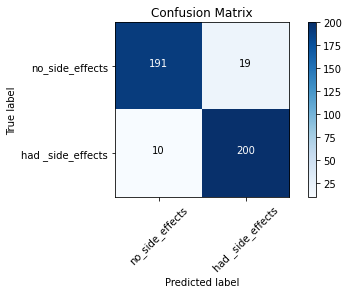

In [ ]:
cm_plot_labels=['no_side_effects','had _side_effects']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')

## Save and Load a Model

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_25 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### 1.model.save

In [ ]:
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
  model.save('models/medical_trial_model.h5') #save architecture,allowing to recreate the model,weights of model,training configuration(loss,optimizer),state of optimizer,allowing to resume training exacly where we left off

In [ ]:
from tensorflow.keras.models import load_model
new_model=load_model('models/medical_trial_model.h5')

In [ ]:
new_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_25 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
new_model.get_weights()

[array([[-0.45961857,  0.3029455 , -0.1461199 ,  0.51454914,  0.7189963 ,
          0.6442492 , -0.50901115, -0.07750553,  0.5428519 ,  0.06784812,
          0.40108368, -0.45583954,  0.21239555, -0.5711283 , -0.47688413,
         -0.12767744]], dtype=float32),
 array([ 0.        ,  0.15569475,  0.        , -0.14459051,  0.02684681,
        -0.14197293,  0.        ,  0.        , -0.13935748,  0.2605563 ,
        -0.12636338,  0.        , -0.07954004,  0.        ,  0.        ,
         0.        ], dtype=float32),
 array([[-0.15906869, -0.2612875 , -0.16969493, -0.1247153 , -0.2436843 ,
         -0.13204338, -0.34689343,  0.25298795, -0.20090517,  0.04284725,
          0.18029091,  0.33665118, -0.04166064,  0.10426188,  0.1364108 ,
          0.06518432, -0.35343376, -0.2505003 , -0.15559672, -0.23713848,
         -0.08204964,  0.2609848 , -0.1550382 , -0.1690328 ,  0.10019147,
          0.25237104, -0.26835144,  0.19295791,  0.26651904, -0.2359893 ,
         -0.25266725,  0.1520054 ],
 

In [ ]:
new_model.optimizer

### 2.model.to_json()

In [ ]:
# save as JSON
json_string=model.to_json()   # only save the architecture of model

# save as YAML
# yaml_string=model.to_yaml()

In [ ]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_8", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_24_input"}}, {"class_name": "Dense", "config": {"name": "dense_24", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_25", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null

In [ ]:
from tensorflow.keras.models import model_from_json
model_architecture=model_from_json(json_string)

In [ ]:
model_architecture.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_25 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### 3.model.save_weights()

In [ ]:
import os.path
if os.path.isfile('models/my_model_weights.h5') is False:
  model.save_weights('models/my_model_weights.h5')

OSError: ignored

In [ ]:
model2=Sequential([                                                            #dense means fully connected layer in ANN
                  Dense(units=16, input_shape=(1,), activation='relu'), # 1 hidden layer with 16 nodes with relu activation
                  Dense(units=32, activation='relu'),                   # 2 hidden layer with 32 nodes with relu activation
                  Dense(units=2, activation='softmax')                  # output layer with 2 possible outcomes with softmax activation
])

In [ ]:
model2.load_weights('models/my_model_weights.h5')

In [ ]:
model2.get_weights()

[array([[-0.45961857,  0.3029455 , -0.1461199 ,  0.51454914,  0.7189963 ,
          0.6442492 , -0.50901115, -0.07750553,  0.5428519 ,  0.06784812,
          0.40108368, -0.45583954,  0.21239555, -0.5711283 , -0.47688413,
         -0.12767744]], dtype=float32),
 array([ 0.        ,  0.15569475,  0.        , -0.14459051,  0.02684681,
        -0.14197293,  0.        ,  0.        , -0.13935748,  0.2605563 ,
        -0.12636338,  0.        , -0.07954004,  0.        ,  0.        ,
         0.        ], dtype=float32),
 array([[-0.15906869, -0.2612875 , -0.16969493, -0.1247153 , -0.2436843 ,
         -0.13204338, -0.34689343,  0.25298795, -0.20090517,  0.04284725,
          0.18029091,  0.33665118, -0.04166064,  0.10426188,  0.1364108 ,
          0.06518432, -0.35343376, -0.2505003 , -0.15559672, -0.23713848,
         -0.08204964,  0.2609848 , -0.1550382 , -0.1690328 ,  0.10019147,
          0.25237104, -0.26835144,  0.19295791,  0.26651904, -0.2359893 ,
         -0.25266725,  0.1520054 ],
 